In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

,ts,close_bin,close_kra,spread,signal_long,signal_short,pnl_long,pnl_short
0,2025-07-07 14:23:00,108135.53,108224.1,-88.57,False,False,0.0,0.0
1,2025-07-07 14:24:00,108135.53,108236.1,-100.57,False,False,0.0,0.0
2,2025-07-07 14:25:00,108135.53,108238.1,-102.57,False,False,0.0,0.0
3,2025-07-07 14:26:00,108135.53,108283.8,-148.27,False,False,0.0,0.0
4,2025-07-07 14:27:00,108135.53,108283.8,-148.27,False,False,0.0,0.0
5,2025-07-07 14:28:00,108135.53,108231.0,-95.47,False,False,0.0,0.0
6,2025-07-07 14:29:00,108135.53,108169.1,-33.57,False,False,0.0,0.0
7,2025-07-07 14:30:00,108135.53,108169.1,-33.57,False,False,0.0,0.0
8,2025-07-07 14:31:00,108135.53,108157.6,-22.07,False,False,0.0,0.0
9,2025-07-07 14:32:00,108135.53,108157.2,-21.67,False,False,0.0,0.0


,ts,open_bin,high_bin,low_bin,close_bin,vol_bin,open_kra,high_kra,low_kra,close_kra,vol_kra,spread,total_fee,min_spread,signal_long,signal_short,pnl_long,pnl_short,cum_pnl_long,cum_pnl_short
249,2025-07-07 18:32:00,107824.24,107824.24,107824.24,107824.24,0.00000,107600.1,107600.1,107520.3,107520.4,3.092773,303.84,215.34464,215.34464,True,False,88.49536,0.0,193.32094,3684.43331
246,2025-07-07 18:29:00,107824.24,107824.24,107824.24,107824.24,0.00000,107563.8,107563.8,107538.0,107557.8,0.914515,266.44,215.38204,215.38204,True,False,51.05796,0.0,96.10992,3684.43331
245,2025-07-07 18:28:00,107824.24,107824.24,107824.24,107824.24,0.00000,107670.9,107670.9,107560.2,107563.8,3.984793,260.44,215.38804,215.38804,True,False,45.05196,0.0,45.05196,3684.43331
477,2025-07-07 22:20:00,108272.90,108272.90,108272.90,108272.90,0.00000,108065.6,108065.6,108016.2,108023.1,0.066835,249.80,216.29600,216.29600,True,False,33.50400,0.0,251.85690,4087.51331
478,2025-07-07 22:21:00,108272.89,108272.90,108272.89,108272.90,0.00009,108023.1,108027.2,108023.1,108027.1,0.095501,245.80,216.30000,216.30000,True,False,29.50000,0.0,281.35690,4087.51331
480,2025-07-07 22:23:00,108272.90,108272.90,108272.90,108272.90,0.00000,108039.4,108039.4,108028.2,108028.2,0.013620,244.70,216.30110,216.30110,True,False,28.39890,0.0,326.94350,4087.51331
250,2025-07-07 18:33:00,107824.24,107824.24,107824.24,107824.24,0.00000,107520.5,107583.8,107520.5,107583.8,0.031752,240.44,215.40804,215.40804,True,False,25.03196,0.0,218.35290,3684.43331
484,2025-07-07 22:27:00,108272.90,108272.90,108272.90,108272.90,0.00000,108076.0,108076.0,108001.4,108038.2,35.001493,234.70,216.31110,216.31110,True,False,18.38890,0.0,345.33240,4087.51331
487,2025-07-07 22:30:00,108272.90,108272.90,108272.90,108272.90,0.00000,108038.3,108038.3,108038.2,108038.2,0.375063,234.70,216.31110,216.31110,True,False,18.38890,0.0,400.29890,4087.51331
488,2025-07-07 22:31:00,108272.90,108272.90,108272.90,108272.90,0.00000,108038.2,108038.3,108038.2,108038.3,0.098907,234.60,216.31120,216.31120,True,False,18.28880,0.0,418.58770,4087.51331


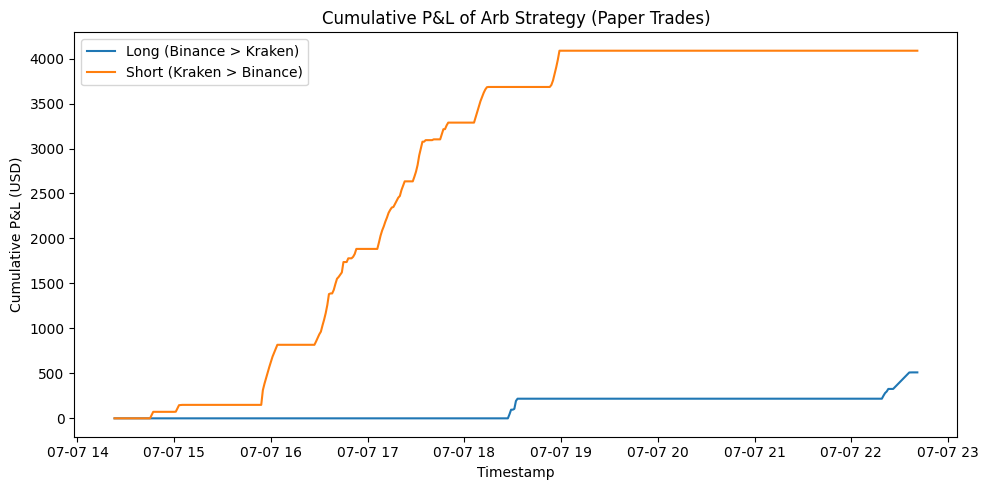

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from src.spread import compute_spread

# Parameters
trade_size = 1.0  # units of asset
taker_fee_rate = 0.001  # 0.1% fee per trade side

# Load the merged DataFrame with spreads and signals
# Pass trade_size and taker_fee_rate to compute_spread

df = compute_spread('../data/binance_1m.csv', '../data/kraken_1m.csv', trade_size=trade_size, taker_fee_rate=taker_fee_rate)

# Simulate P&L for each direction
# Long: Buy on binance, sell on kraken
# Short: Buy on kraken, sell on binance

df['pnl_long'] = 0.0
long_indices = df['signal_long']
df.loc[long_indices, 'pnl_long'] = (
    (df.loc[long_indices, 'close_bin'] - df.loc[long_indices, 'close_kra']) * trade_size
    - trade_size * taker_fee_rate * (df.loc[long_indices, 'close_bin'] + df.loc[long_indices, 'close_kra'])
)

df['pnl_short'] = 0.0
short_indices = df['signal_short']
df.loc[short_indices, 'pnl_short'] = (
    (df.loc[short_indices, 'close_kra'] - df.loc[short_indices, 'close_bin']) * trade_size
    - trade_size * taker_fee_rate * (df.loc[short_indices, 'close_bin'] + df.loc[short_indices, 'close_kra'])
)

# Cumulative P&L for both directions

df['cum_pnl_long'] = df['pnl_long'].cumsum()
df['cum_pnl_short'] = df['pnl_short'].cumsum()

# Display the first few results
from IPython.display import display
display(df[['ts','close_bin','close_kra','spread','signal_long','signal_short','pnl_long','pnl_short']].head(10))
display(df.sort_values('spread', ascending=False).head(10))

# Plot cumulative P&L for both directions
plt.figure(figsize=(10, 5))
plt.plot(df['ts'], df['cum_pnl_long'], label='Long (Binance > Kraken)')
plt.plot(df['ts'], df['cum_pnl_short'], label='Short (Kraken > Binance)')
plt.title("Cumulative P&L of Arb Strategy (Paper Trades)")
plt.xlabel("Timestamp")
plt.ylabel("Cumulative P&L (USD)")
plt.legend()
plt.tight_layout()
plt.show()

